### Question 1(a): Use seaborn to create a simple heatmap to see where we are missing data.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../dataset/titanic_train.csv")
data.head(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
print(f"Dataset shape: {data.shape[0]} rows × {data.shape[1]} columns")
print("Columns:", list(data.columns))

Dataset shape: 891 rows × 12 columns
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


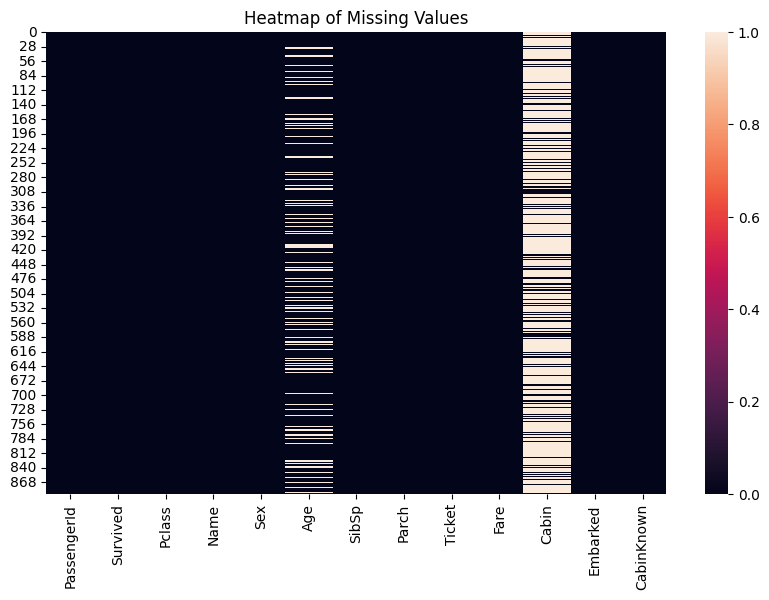

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isna(), cbar = True)
plt.title("Heatmap of Missing Values")
plt.show()

### Question 1(b): Plot a graph showing survived people based on known/ unknown cabin information.

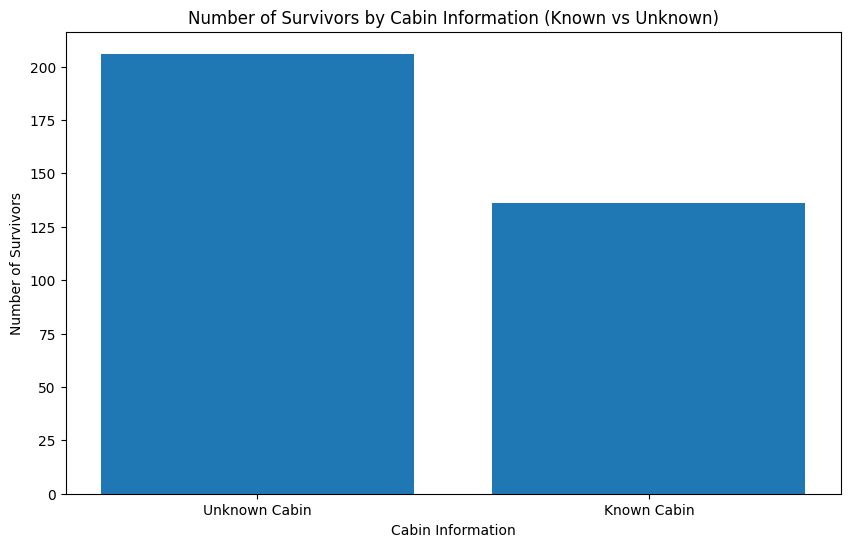

In [15]:

data['CabinKnown'] = data['Cabin'].notna() 

survivors_by_cabin_known = data[data['Survived'] == 1].groupby('CabinKnown').size()

labels = ['Unknown Cabin', 'Known Cabin']  

x_positions = np.arange(2)          
counts = [survivors_by_cabin_known.get(False, 0), survivors_by_cabin_known.get(True, 0)] 

plt.figure(figsize=(10, 6))                
plt.bar(x_positions, counts)              
plt.xticks(x_positions, labels)   
plt.title("Number of Survivors by Cabin Information (Known vs Unknown)")
plt.ylabel("Number of Survivors")
plt.xlabel("Cabin Information")

plt.show()

### Question 1(c): Bar chart for (b) adding gender information.

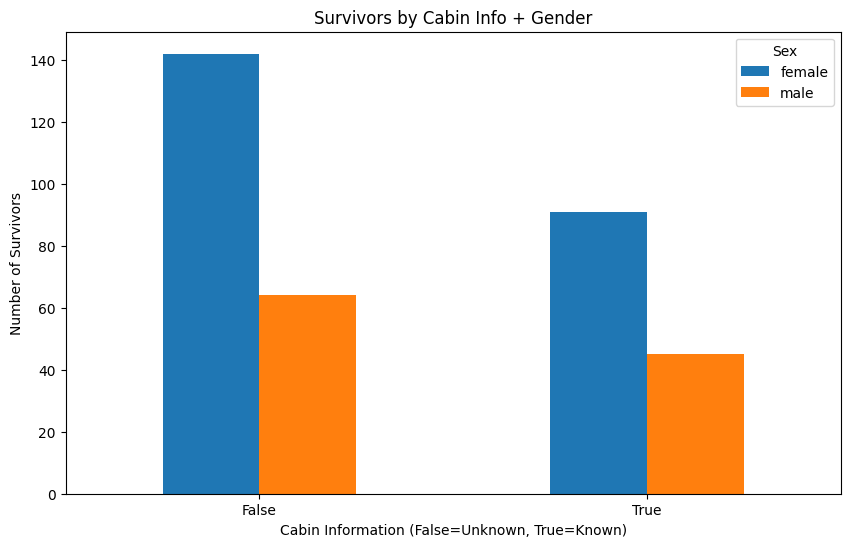

In [17]:
survivors_cabin_sex = (
    data[data['Survived'] == 1]
    .groupby(['CabinKnown', 'Sex'])
    .size()
    .unstack('Sex', fill_value=0)
)

plt.figure(figsize=(10, 6))               
survivors_cabin_sex.plot(kind='bar', ax=plt.gca()) 
plt.title("Survivors by Cabin Info + Gender")
plt.xlabel("Cabin Information (False=Unknown, True=Known)")
plt.ylabel("Number of Survivors")
plt.xticks(rotation=0)

plt.show()

### Quesiton 1(d): Bar chart for (b) adding passenger class information.

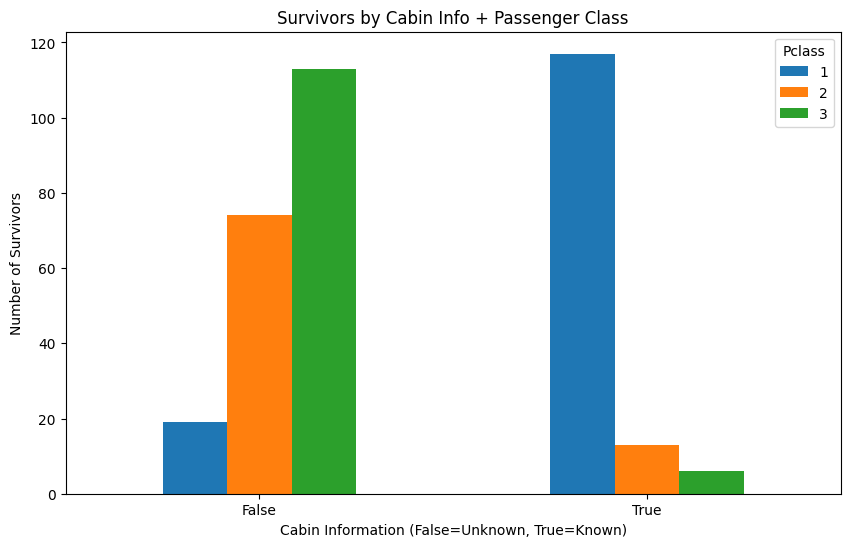

In [19]:
survivors_cabin_pclass = (
    data[data['Survived'] == 1]
    .groupby(['CabinKnown', 'Pclass'])
    .size()
    .unstack('Pclass', fill_value=0)   
    .sort_index()                      
)

plt.figure(figsize=(10, 6))
survivors_cabin_pclass.plot(kind='bar', ax=plt.gca())
plt.title("Survivors by Cabin Info + Passenger Class")
plt.xlabel("Cabin Information (False=Unknown, True=Known)")
plt.ylabel("Number of Survivors")
plt.xticks(rotation=0)

plt.show()

### Question 1(e): Histogram of age with bin size 40.

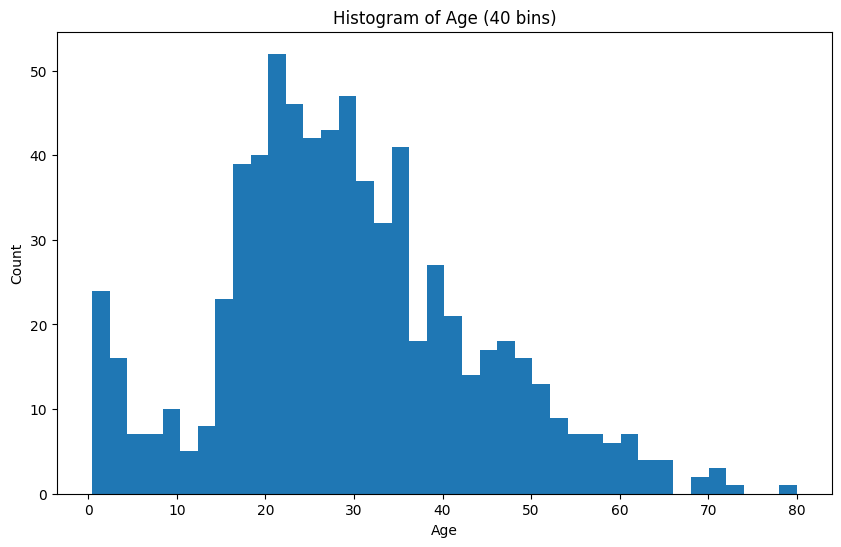

In [21]:
ages = data['Age'].dropna()      
plt.figure(figsize=(10, 6))   
plt.hist(ages, bins=40)       
plt.title("Histogram of Age (40 bins)")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

### Question 1(f): Bar chart showing count of sibling/spouse information.

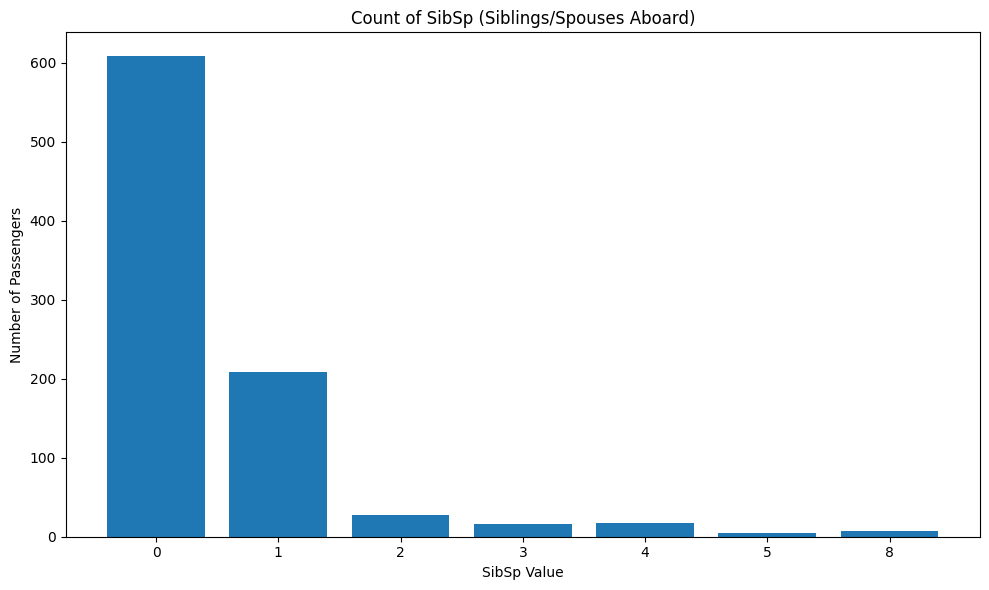

In [ ]:
sibsp_counts = data['SibSp'].value_counts().sort_index() 

plt.figure(figsize=(10, 6))      
plt.bar(sibsp_counts.index.astype(str), sibsp_counts.values)
plt.title("Count of SibSp (Siblings/Spouses Aboard)")
plt.xlabel("SibSp Value")
plt.ylabel("Number of Passengers")

plt.show()

### Question 1(g): Histogram bar chart of fare with bin size 40.

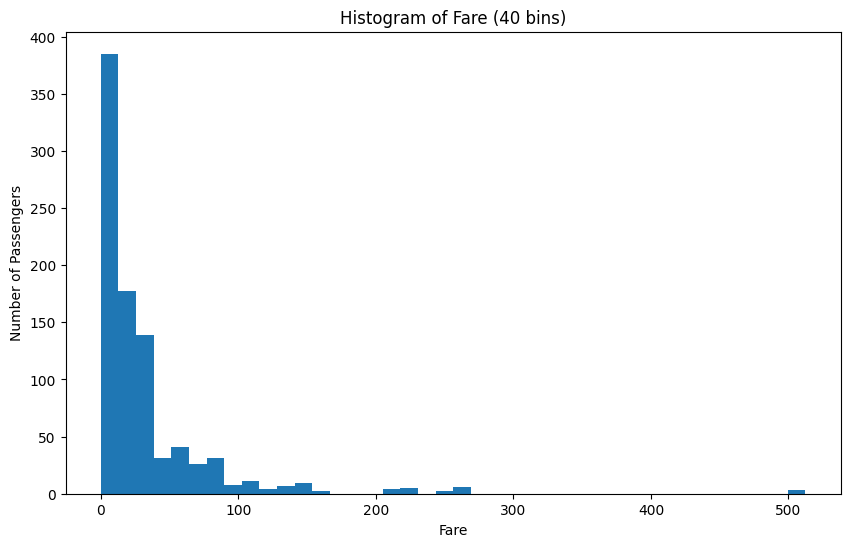

In [23]:
fares = data['Fare'].dropna()  
plt.figure(figsize=(10, 6))  
plt.hist(fares, bins=40)    
plt.title("Histogram of Fare (40 bins)")
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")

plt.show()

### Question 1(h): Box plot of mean age distribution per class.

C:\Users\bahut\AppData\Local\Temp\ipykernel_23560\829503673.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(age_groups, labels=[str(c) for c in classes_sorted])


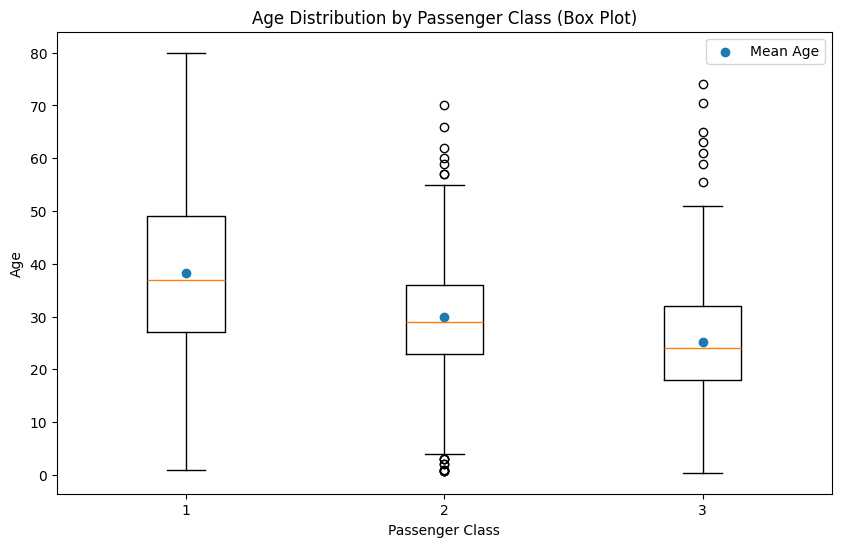

In [24]:
classes_sorted = sorted(data['Pclass'].dropna().unique()) 
age_groups = [data.loc[data['Pclass'] == c, 'Age'].dropna() for c in classes_sorted] 

plt.figure(figsize=(10, 6))     
plt.boxplot(age_groups, labels=[str(c) for c in classes_sorted]) 
plt.title("Age Distribution by Passenger Class (Box Plot)")
plt.xlabel("Passenger Class")
plt.ylabel("Age")

class_means = [g.mean() if len(g) > 0 else np.nan for g in age_groups] 
plt.scatter(range(1, len(classes_sorted) + 1), class_means, label="Mean Age", marker='o') 
plt.legend()         

plt.show()

### Question 1(i): Fill missing age values with mean age.

In [ ]:
mean_age = data['Age'].mean()       
data['Age'] = data['Age'].fillna(mean_age) 
print(f"Filled missing Age with mean value: {mean_age:.2f}")


Filled missing Age with mean value: 29.70


In [32]:
#data.head(20)

### Question 1(j): Drop the column having mostly missing values.

In [ ]:
if 'Cabin' in data.columns:
    missing_ratio = data['Cabin'].isna().mean()
    print(f"'Cabin' missing ratio: {missing_ratio:.2%}")
    data = data.drop(columns=['Cabin'])
    print("'Cabin' dropped")

'Cabin' missing ratio: 77.10%
'Cabin' dropped


### Question 1(k): Drop other columns like ('Sex', 'Embarked', 'Name', 'Ticket') not neccessary for training.

In [35]:
cols_to_drop = [c for c in ['Sex', 'Embarked', 'Name', 'Ticket'] if c in data.columns]  
data = data.drop(columns=cols_to_drop)
print("Dropped columns:", cols_to_drop)

Dropped columns: []


In [40]:
#data.head(20)

### Question 1(l): Train/test split and logistic regression model.

In [42]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score

y = data['Survived']  


feature_columns = [c for c in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] if c in data.columns] 
X = data[feature_columns]  

rows_before = len(X)
mask_no_na = ~X.isna().any(axis=1)
X = X[mask_no_na]
y = y[mask_no_na]
rows_after = len(X)
if rows_after < rows_before:
    print(f"Dropped {rows_before - rows_after} rows with remaining missing feature values for model training.")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

model = LogisticRegression(max_iter=1000)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)           
acc = accuracy_score(y_test, y_pred)  

print("\n--- LOGISTIC REGRESSION RESULTS ---")
print("Features used:", feature_columns)
print(f"Test Accuracy: {acc:.4f}")



--- LOGISTIC REGRESSION RESULTS ---
Features used: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Test Accuracy: 0.7318
